<a href="https://colab.research.google.com/github/ghostpasha01/Veri_Bilimi_projelerim/blob/main/G%C3%B6g%C3%BCs_Kanser_Analizi_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kütüphanelerin yüklenmsi
#Temel kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#makine öğrenmesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.decomposition import PCA
#uyarılar
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Veri setimizi içeri aktaralım
veri=pd.read_csv("C://Users//Hp//Desktop//Gögüs kanser analizi//Kanser.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Geriksiz özelikleri çıkartalım
veri.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [ ]:
#verinin içerisinde bulunan hastalık tanımı özeliginin ismini değiştir.
veri=veri.rename(columns={"diagnosis":"hedef"})

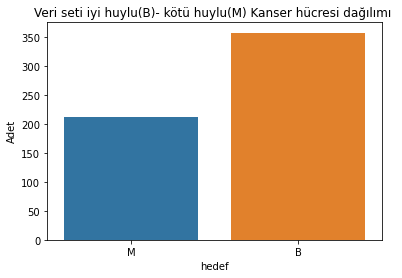

B    357
M    212
Name: hedef, dtype: int64


In [ ]:
#Veri içerisinde bulunan hastalık dağılımına bakalım
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri seti iyi huylu(B)- kötü huylu(M) Kanser hücresi dağılımı ")
plt.show()
print(veri.hedef.value_counts())

In [ ]:
#veri içerisinde hedef etiketlerin altında bulunan verilerin tipini iceri aktarna
# "M"=>1,"B"=>0
veri["hedef"]=[1 if i.strip()=="M" else 0 for i in veri.hedef]
veri.head()


,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#verinin uzunlugu 
print("verinin uzunlugu:",len(veri))

verinin uzunlugu: 569


In [ ]:
#verinin şekli
print("verinin şekli:",veri.shape)

verinin şekli: (569, 31)


In [ ]:
#Veri özelikleri hakkıda bilgi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hedef                    569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#verinin temel istatiksel özeliklerine bakalım
veri.describe() # eger burda describe().T yaparsan transpozunu almış olursun

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Veriyi tanımak için yaptıgımız bu temel analizlerden ,verinin egitim 
#öncesi standardize edilmesi gerektigini ve içerisinde kayıp veri bulunmadıgını anlayabilir.

# Keşifsel-Açıklayıcı Veri Analizi

<Figure size 864x576 with 0 Axes>

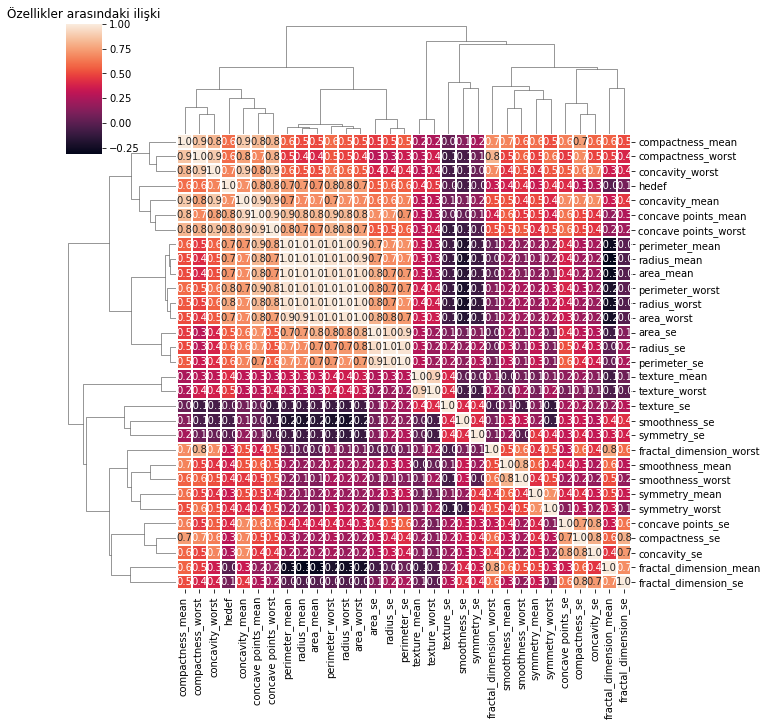

In [ ]:
#Verinin içerisinde bulunan degeerlerin arasindaki ilişkiye bakalım
corr_matrix=veri.corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix,annot=True,fmt=".1f",linewidths=.01)
plt.title("Özellikler arasındaki ilişki")
plt.show()

<Figure size 432x288 with 0 Axes>

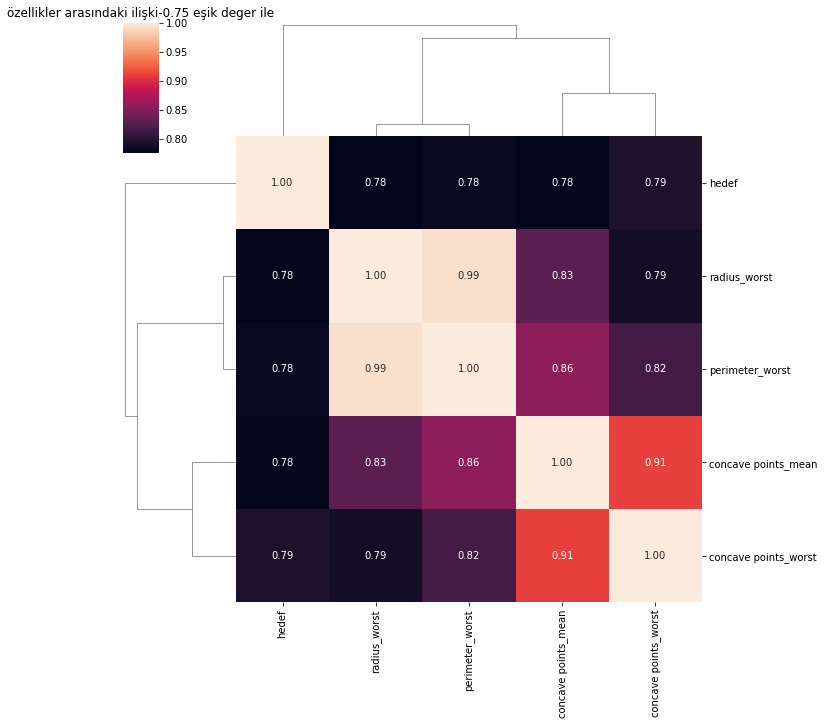

In [ ]:
#hedef ile arasindaki ilişki artı/eksi 0.75 den büyük olanlara göz atalım
threshold=0.75
filtre=np.abs(corr_matrix["hedef"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(),annot=True,fmt=".2f")
plt.title("özellikler arasındaki ilişki-0.75 eşik deger ile")
plt.show()

<Figure size 432x288 with 0 Axes>

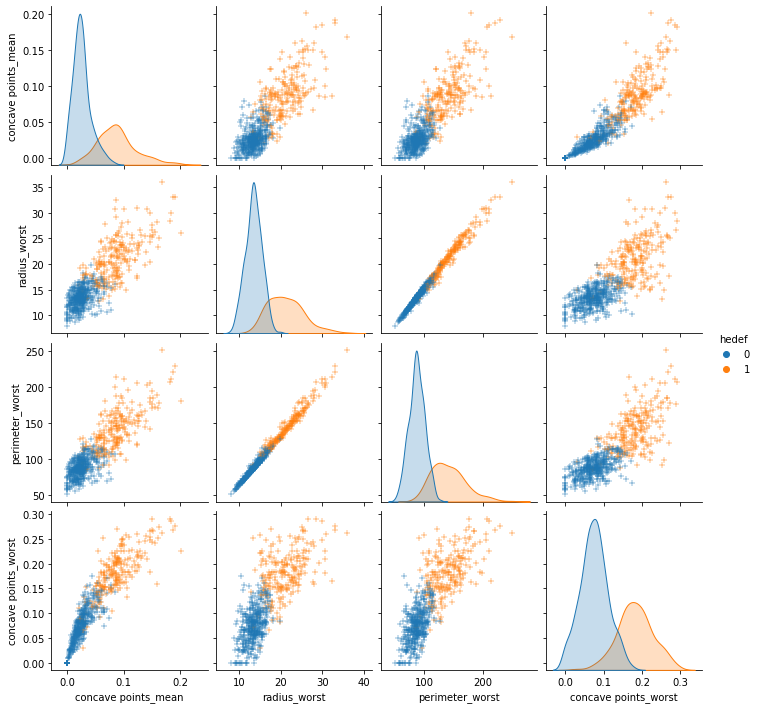

In [ ]:
#Hedef ile ilişki özeliklerin saçılımına bakalım
plt.figure()
sns.pairplot(veri[corr_features],diag_kind="kde",markers="+",hue="hedef")
plt.show()

# aykırı deger tespiti ve çıkarılması

In [ ]:
#veriyi x(bağımsız değişken) ve y(bağımlı değişken)olmak üzere ikiye bölelim
y=veri.hedef
x=veri.drop(["hedef"],axis=1)
columns=x.columns.tolist()

In [ ]:
#yerel aykırı faktör yöntemi
clf=LocalOutlierFactor()
# yerel aykırı faktör yöntemi uygulayalım
y_pred=clf.fit_predict(x)
#skora bakalım
X_score=clf.negative_outlier_factor_

In [ ]:
#Skoru bir veri çercevesi yapıp içerisine ekleyelim
outlier_score=pd.DataFrame()
outlier_score["score"]=X_score

In [ ]:
#belirli bir eşik degere göre aykırı degerleri bulalım
threshold=-2.2
filtre=outlier_score["score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

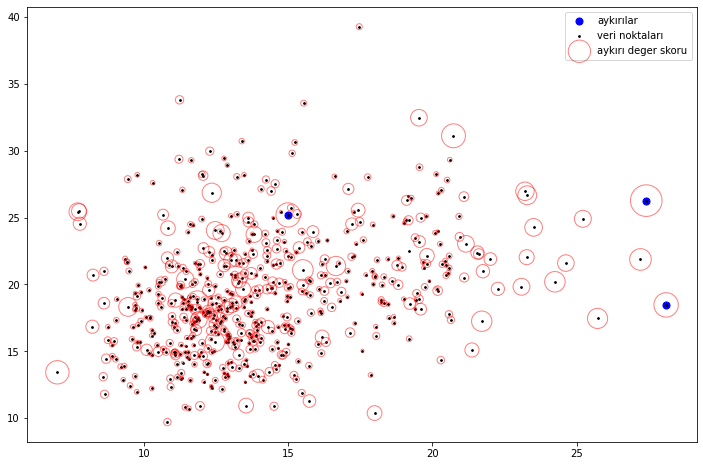

In [ ]:
#yerel aykırı faktör yöntemi ile belirlenen aykırı degerleri çıkaralım
plt.figure(figsize=(12,8))
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",
           s=50,label="aykırılar")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="veri noktaları")
radius=(X_score.max()- X_score)/(X_score.max()- X_score.min())
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors="r",alpha=0.5,facecolors="none",
           label="aykırı deger skoru")
plt.legend()
plt.show()

In [ ]:
# aykırı degerleri çıkartalım
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

# Egitim ve Veri seti bölünmesi

In [ ]:
#egitim test bölünmesi
X_egitim,X_test,Y_egitim,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# standardizasyon

In [ ]:
 #standardizasyon
scaler=StandardScaler()
X_egitim=scaler.fit_transform(X_egitim)
X_test=scaler.fit_transform(X_test)


In [ ]:
#görselleştirmede kullanmakm için veri çerçevesi oluşturalım
X_egitim_df=pd.DataFrame(X_egitim,columns=columns)
X_egitim_df_describe=X_egitim_df.describe()
X_egitim_df["hedef"]=Y_egitim

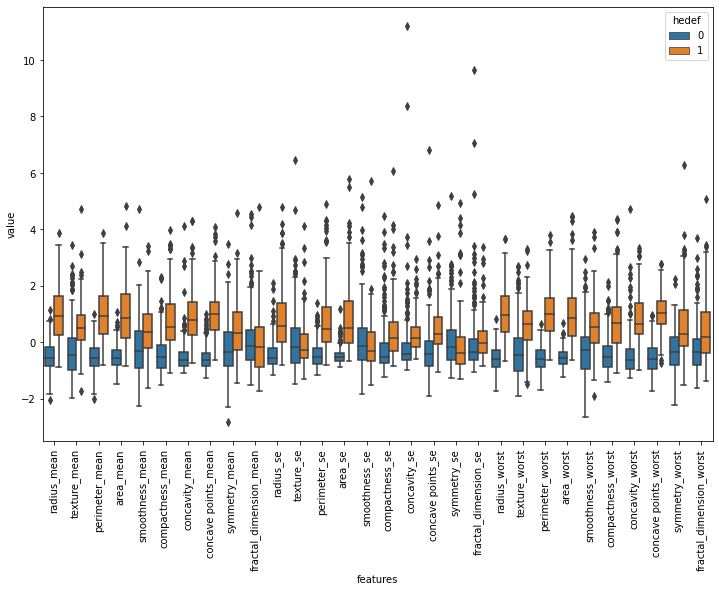

In [ ]:
#kutu grafigi
data_melted=pd.melt(X_egitim_df,id_vars="hedef",
                   var_name="features",
                   value_name="value")
plt.figure(figsize=(12,8))
sns.boxplot(x="features",y="value",hue="hedef",data=data_melted)
plt.xticks(rotation=90)
plt.show()

# K-En yakın komşu

In [ ]:
# k en yakın komşu sınıflandırması
#model
knn=KNeighborsClassifier(n_neighbors=2)
#egitim
knn.fit(X_egitim,Y_egitim)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#tahmin
y_pred=knn.predict(X_test)

karşılık matrisi: [[102   0]
 [ 12  56]]


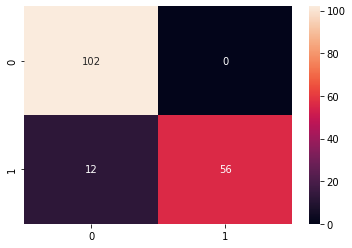

In [ ]:
#karşılık matrisi
cm=confusion_matrix(Y_test,y_pred)
print("karşılık matrisi:",cm)
plt.figure()
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#dogruluk
dogruluk=accuracy_score(Y_test,y_pred)
print("Dogruluk:",dogruluk)

Dogruluk: 0.9294117647058824


In [ ]:
#en iyi k degeri
def eniyiParametreler(x_egitim,x_test,y_egitim,y_test):
    #k degeri
    k_range=list(range(1,31))
    #uniform:tek tip agırlıklar.tüm nok eşit olarak ağırlıklandırılır.
    #distance:mesafelerinin tersine göre ağırlık noktaları bu duruma göre ters orantı
    weight_options=["uniform","distance"]#farklı knn parametreleri
    #ızgara araması için parametreleri bir sözlük içerisinde ekleyelim
    param_grid=dict(n_neighbors=k_range,weights=weight_options)
    #knn sınıflandırıcı
    knn=KNeighborsClassifier()
    #çapraz dogrulama ile ızgara arama
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    #egitim
    grid.fit(x_egitim,y_egitim)
    #en iyi sonucu veren parametleri gösterimi
    print("en iyi egitim skoru:{}ve parametreler:{}".format(grid.best_score_,
                                                           grid.best_params_))
    print()
    #en iyi sonucu veren parametreler ile yeni bir k en yakın komşu modeli yapalım
    knn=KNeighborsClassifier(**grid.best_params_)
    #egitim
    knn.fit(x_egitim,y_egitim)
    #tahminleme
    y_pred_test=knn.predict(x_test)
    y_pred_train=knn.predict(x_egitim)
    #karışılık matrisi
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_egitim,y_pred_train)
    
    #dogruluk ve sonucların yazdırılması
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_egitim,y_pred_train)
    print("test dogrulugu:{}, egitim dogrulugu:{}".format(acc_test,acc_train))
    print()
    print("Karışıklık matrisi test:")
    print(cm_test)
    print("karışıklık matrisi egitim:")
    print(cm_train)
    return grid
    

In [ ]:
#en iyi k degeri ile oluşturulan model
grid=eniyiParametreler(X_egitim,X_test,Y_egitim,Y_test)

en iyi egitim skoru:0.972051282051282ve parametreler:{'n_neighbors': 4, 'weights': 'distance'}

test dogrulugu:0.9470588235294117, egitim dogrulugu:1.0

Karışıklık matrisi test:
[[102   0]
 [  9  59]]
karışıklık matrisi egitim:
[[255   0]
 [  0 141]]


# Temel bileşenler analizi

In [ ]:
#standardizasyon
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
#temel bileşeni tanımla ,2 tane bileşenden oluşsun
pca=PCA(n_components=2)

In [ ]:
#pca egitimi
pca.fit(x_scaled)

PCA(n_components=2)

In [ ]:
#pca uygula
X_reduced_pca=pca.transform(x_scaled)

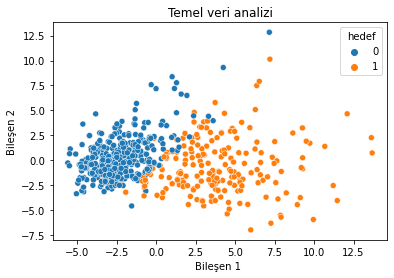

In [ ]:
#pca'i yorumlamak için veri çercevesinde alalım
pca_data=pd.DataFrame(X_reduced_pca,columns=["p1","p2"])
pca_data["hedef"]=y
plt.figure()
sns.scatterplot(x="p1",y="p2",hue="hedef",data=pca_data)
plt.title("Temel veri analizi")
plt.xlabel("Bileşen 1 ")
plt.ylabel("Bileşen 2")
plt.show()



In [ ]:
#pca sonucunu elde edilen verinin egitim ve test bölünmesi
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca=train_test_split(X_reduced_pca,y,test_size=0.3,random_state=42)

In [ ]:
#pca sonucu elde edilen veri için en iyi knn degerlerin bulunması
grid_pca=eniyiParametreler(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)

en iyi egitim skoru:0.9518589743589743ve parametreler:{'n_neighbors': 7, 'weights': 'uniform'}

test dogrulugu:0.9294117647058824, egitim dogrulugu:0.9545454545454546

Karışıklık matrisi test:
[[97  5]
 [ 7 61]]
karışıklık matrisi egitim:
[[247   8]
 [ 10 131]]


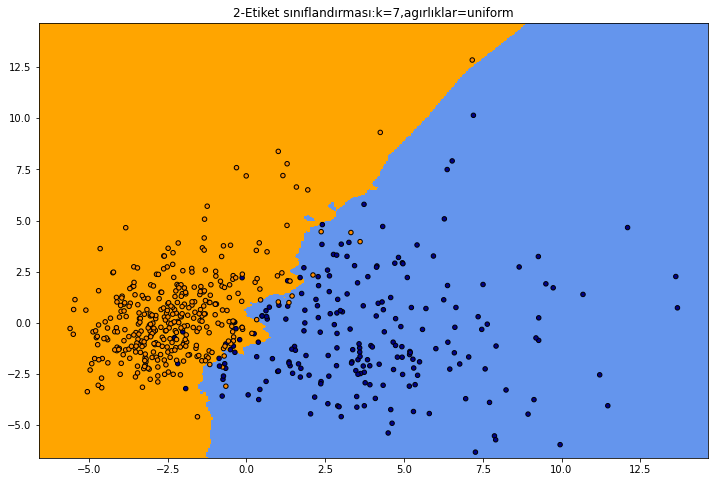

In [ ]:
#pca sonucu edilen veririn tahminlemesi ve görselleştirilmesi
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])
h=0.05 #mesh boyutu
X=X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,0].min()-1,X[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))
Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#egitimde kullanılan her bir noktayı görselleştirelim
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("{}-Etiket sınıflandırması:k={},agırlıklar={}".format(2,grid_pca.best_estimator_.n_neighbors,
                                                               grid_pca.best_estimator_.weights))
plt.show()

# Komşuluk bileşenleri Analizi

In [ ]:
#komşuluk bileşeni tanımla ,2 tane bileşenden oluşsun
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)

In [ ]:
#komşuluk egitimi
nca.fit(x_scaled,y)

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [ ]:
X_reduced_nca=nca.transform(x_scaled)

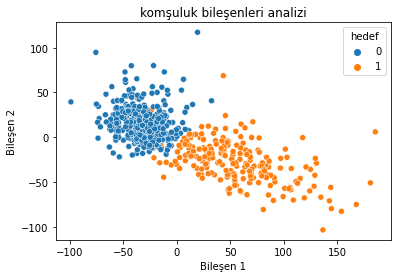

In [ ]:
#komşuluk yorumlamak için veri çerçecesine alalalım
nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["hedef"]=y
plt.figure()
sns.scatterplot(x="p1",y="p2",hue="hedef",data=nca_data)
plt.title("komşuluk bileşenleri analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [ ]:
#nca sonucu elde edilen verinin egitim ve test bölünmesi
X_train_nca,X_test_nca,Y_train_nca,Y_test_nca=train_test_split(X_reduced_nca,y,test_size=0.3,random_state=42)

In [ ]:
#pca sonucu elde edilen veri için en iyi knn degerlerinni bulunması
grid_pca=eniyiParametreler(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)

en iyi egitim skoru:0.9518589743589743ve parametreler:{'n_neighbors': 7, 'weights': 'uniform'}

test dogrulugu:0.9294117647058824, egitim dogrulugu:0.9545454545454546

Karışıklık matrisi test:
[[97  5]
 [ 7 61]]
karışıklık matrisi egitim:
[[247   8]
 [ 10 131]]


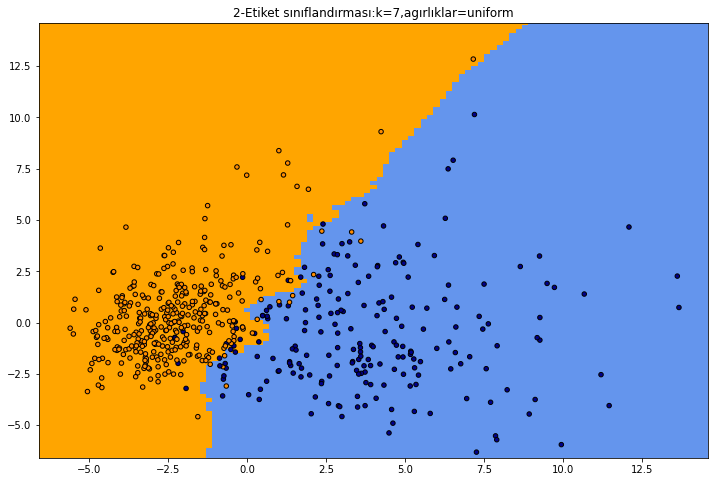

In [ ]:
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])
h=0.2 #mesh boyutu
X=X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,0].min()-1,X[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))
Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#egitimde kullanılan her bir noktayı görselleştirelim
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
           edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("{}-Etiket sınıflandırması:k={},agırlıklar={}".format(2,grid_pca.best_estimator_.n_neighbors,
                                                               grid_pca.best_estimator_.weights))
plt.show()